# UV LF code with observations

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import pandas as pd
from matplotlib.ticker import MaxNLocator
import os
import reionizer

#Call data files
LFz_data_dir = os.environ['LYA_DATA_DIR']+'data/models/' #calls directory
LFz_dir = LFz_data_dir+'MTT15_UVLF/LF_pred/' #inside models folder call MTT15_UVLF/LF_pred/ folder
LFz_files = sorted(reionizer.insensitive_glob(LFz_dir+'LF_pred_z*.txt')) 
#calls each file in modelled data * will be replaced with corresponding zval


#Call LF_pred files by calling file name at specific z value 
LFz_tab = np.array([float(f.split('LF_pred_z')[-1].split('.txt')[0]) for f in LFz_files]) 
myorder = [ 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,0,1]
mylist = [LFz_tab[i] for i in myorder]
print(mylist)
#Function used to load files
def load_uvf_pandas(ufl_filename): 
    """
    Load table into pandas df
    """
    uvf_tab_df = pd.read_csv(ufl_filename, skiprows=1, delim_whitespace=True)
    
    # Shuffle the column names to remove the '#' from the first column
    uvf_tab_df.columns = np.roll(uvf_tab_df.columns, -1)

    # Cut off the last (empty) column
    uvf_tab_df = uvf_tab_df.iloc[:, :-1]

    return uvf_tab_df

#Define variables by calling array for  
zval_array = np.array([6.0,6.8,7.9,9.0,10.4])
# zval_order = [zval_array[i] for i in myorder]
zval_array1 = np.array([0.3,2.0,3.8,4.9])





# For plotting purposes
plt.style.use(['default','seaborn-colorblind','seaborn-ticks'])
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

[5.0, 5.5, 5.7, 5.9, 6.0, 6.5, 6.6, 6.8, 7.0, 7.3, 7.5, 7.9, 8.0, 8.5, 9.0, 10.0, 10.4]


[[1.260e-06 1.061e-06 3.349e-06]
 [0.000e+00 2.720e-06 8.620e-06]]
[[6.670e-07 1.260e-06 2.510e-05]
 [1.717e-06 0.000e+00 0.000e+00]]


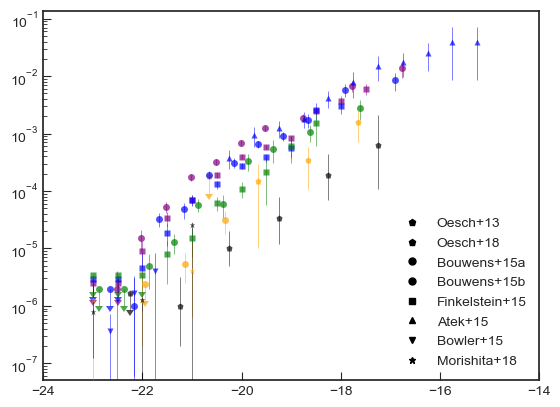

In [2]:
zvals = [5.9,6.8,7.9,9.0,10.4]
color_list = ['purple','blue','green','orange','black']

obs_dict = {'O13':{'label':r'Oesch+13', 'file_prefix':'LF_obs/O13_LF_z', 'marker':'p'},
            'O18':{'label':r'Oesch+18', 'file_prefix':'LF_obs/O18_LF_z', 'marker':'p'},
           'B15a':{'label':r'Bouwens+15a', 'file_prefix':'LF_obs/B15a_LF_z', 'marker':'o'},
           'B15b':{'label':r'Bouwens+15b', 'file_prefix':'LF_obs/B15b_LF_z', 'marker':'o'},
            'F15':{'label':r'Finkelstein+15', 'file_prefix':'LF_obs/F15_LF_z', 'marker':'s'},
            'A15':{'label':r'Atek+15', 'file_prefix':'LF_obs/Atek15_LF_z', 'marker':'^'},
            'Bow15':{'label':r'Bowler+15', 'file_prefix':'LF_obs/Bow15_LF_z', 'marker':'v'},
            'M18':{'label':r'Morishita+18', 'file_prefix':'LF_obs/M18_LF_z', 'marker':'*'}
           }

obs_dir = os.environ['LYA_DATA_DIR']+'data/models/'

def plot_LF_obs(ob_dict, z, ms=5, color=color_list, mfc='w', 
                alpha=1, capthick=0.5, elw=0.5):
    file_path = obs_dir+ob_dict['file_prefix']+f'{z:.1f}.dat'
    if os.path.exists(file_path):
        ob = np.genfromtxt(file_path, comments='#')
        uplims = (ob[:,2] == 0.0)
        # rescale LFs with ndens/1e-3
        if ob_dict['label'] == 'Oesch+13' or ob_dict['label'][0] == 'F':
            ndens = ob[:,1]*1E-3
            yerrs = ob[:,2]*1E-3 + uplims*ndens/2
        
        # rescale LFs with ndens/1e-6
        elif ob_dict['label'] == 'Bowler+15':
            ndens = ob[:,1]*1E-6
            yerrs = ob[:,2]*1E-6 + uplims*ndens/2
        
        elif ob_dict['label'] == 'Oesch+18':
            ndens = ob[:,1]*1E-4
            yerrl =(ob[:,3]*1E-4 + uplims*ndens/2)
            yerru = (ob[:,2]*1E-4 + uplims*ndens/2) 
            yerrs = np.array([yerrl,yerru])
        
        elif ob_dict['label'] == 'Atek+15':
            ndens = 10**(ob[:,1])
            yerrs = 0.5*(10**(ob[:,1]+ob[:,2]) - 10**(ob[:,1]-ob[:,2]))
#             yerrs = 10**(ob[:,2]+ uplims*ndens/2)
        elif ob_dict['label'] == 'Morishita+18':
            ndens = ob[:,1]
            yerrl = ndens - (ob[:,3]+ uplims*ndens/2)
            yerru = (ob[:,2]+ uplims*ndens/2) - ndens
            yerrs = np.array([yerrl,yerru])
            print(yerrs)

#             yerrs = 10**(ob[:,2]+ uplims*ndens/2)
        else:
            ndens = ob[:,1]
            yerrs  = ob[:,2] + uplims*ndens/2
        plt.errorbar(ob[:,0], ndens, marker=ob_dict['marker'], 
                     yerr =yerrs, uplims=uplims, 
                     ms=ms, capthick=capthick, elinewidth=elw, alpha=alpha, 
                     mec='None', color=color, mfc=mfc, ls='none', zorder=5)
        plt.semilogy(1e-7)
        plt.xlim(-24,-14)
        ln = mlines.Line2D([], [], marker=ob_dict['marker'], c='k', lw=0, markersize=ms, label=ob_dict['label'])

        return ln


handles_obs = []
for ob in obs_dict:
    for z, color in zip(np.unique(zvals),color_list):
        ln = plot_LF_obs(obs_dict[ob], z=z, mfc=color, elw=0.5, capthick=0, ms=5, alpha=0.7, color=color) 
        if ln is not None:
            handles_obs.append(ln) 
reorder = [0, 1, 2, 5, 6,9,10,11]
handles_obs = [handles_obs[i] for i in reorder]
plt.legend(handles=handles_obs,loc = 'lower right', fontsize=10)



[[1.260e-06 1.061e-06 3.349e-06]
 [0.000e+00 2.720e-06 8.620e-06]]
[[6.670e-07 1.260e-06 2.510e-05]
 [1.717e-06 0.000e+00 0.000e+00]]


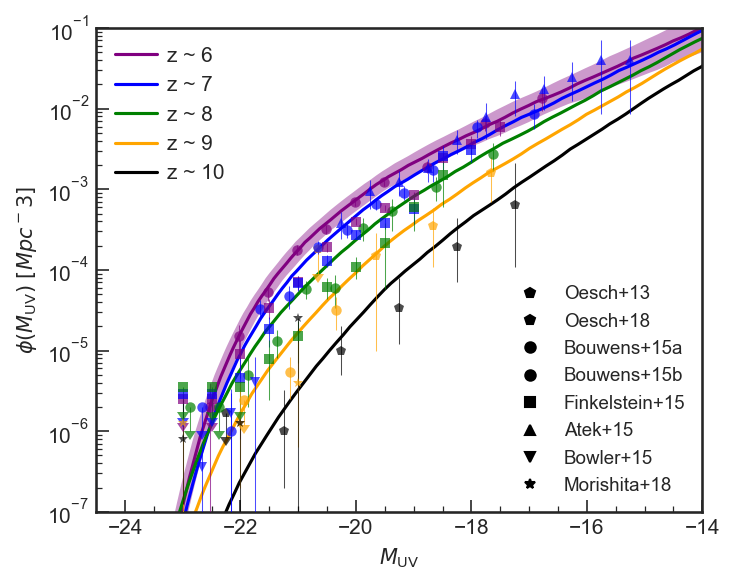

In [3]:

fig = plt.figure(figsize=(5.,4.), dpi=150)


#For loop used in order to plot data for each zval
for zz,zval in enumerate (mylist): 
    if zval in zval_array:
#         LF_tab = load_uvf_pandas(LFz_files[zz])
        UVLF_files = LFz_dir+f'LF_pred_z{zval:.1f}.txt'
        LFz_file = load_uvf_pandas(UVLF_files)
        label = 'z ~ %.0f'%zval
        ls = 'solid'
        if zval == 6.0:
            my_color=color_list[0]
            plt.plot(LFz_file['Muv'],LFz_file['ndens'],color=my_color, ls=ls, label=label)
            plt.fill_between(LFz_file['Muv'],LFz_file['ndens_l'],LFz_file['ndens_u'],lw = 0, color=my_color, alpha=0.4)
        elif zval == 6.8:
            my_color = color_list[1]
            plt.plot(LFz_file['Muv'],LFz_file['ndens'],color=my_color, ls=ls, label=label)
        elif zval == 7.9:
            my_color = color_list[2]
            plt.plot(LFz_file['Muv'],LFz_file['ndens'],color=my_color, ls=ls, label=label)
        elif zval == 9.0:
            my_color = color_list[3]
            plt.plot(LFz_file['Muv'],LFz_file['ndens'],color=my_color, ls=ls, label=label)
        elif zval == 10.4:
            my_color = color_list[4]
            plt.plot(LFz_file['Muv'],LFz_file['ndens'],color=my_color, ls=ls, label=label)


#Legend
leg_z = plt.legend(frameon=False, handletextpad=0.5, loc = 'upper left')
plt.gca().add_artist(leg_z)
handles_obs = []
for ob in obs_dict:
    for z, color in zip(zvals,color_list):
        ln = plot_LF_obs(obs_dict[ob], z=z, mfc=color, elw=0.5, capthick=0, ms=5, alpha=0.7, color=color) 
        if ln is not None:
            handles_obs.append(ln) 
reorder = [0, 1, 2, 5, 6,9,10,11]
handles_obs = [handles_obs[i] for i in reorder]
plt.legend(handles=handles_obs,loc = 'lower right', fontsize=9)

plt.minorticks_on()
plt.xlim(-24.5,-14)
plt.ylim(1e-7, 1e-1)
plt.semilogy()


plt.xlabel('$M_\mathrm{UV}$')
plt.ylabel(r'$\phi(M_\mathrm{UV})\ [Mpc^-3]$')
# plt.title('Predicted UV Luminosity Functions')
plt.tight_layout()

#Save the figure
# plt.savefig('UVLF.pdf', dpi=300, bbox_inches='tight')

# plt.show()

# Extra code to replicate old Mason figure

No handles with labels found to put in legend.


NameError: name 'ax1' is not defined

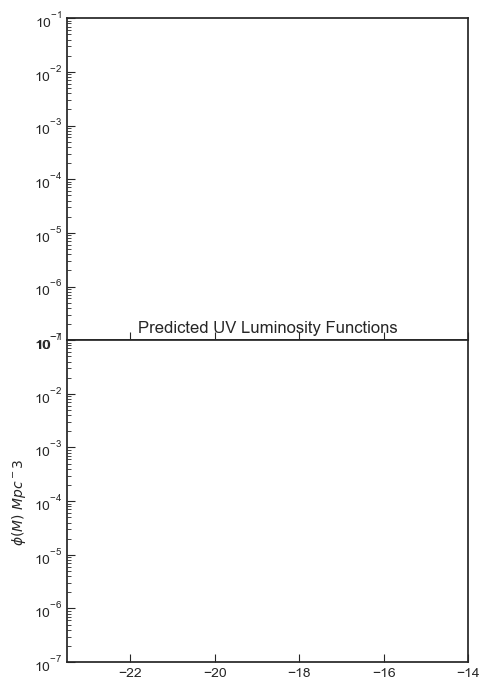

In [24]:
# Ploting values
#rcParams needed to be kept here due to earlier instances of code being run
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
fig = plt.figure(figsize=(5,7))

fig, axs= fig.subplots(ncols=1,nrows=2,gridspec_kw={'hspace': .0},sharex=True, sharey=True)
##This is used for subplots that share same axis

#For loop used in order to plot data for each zval
for zz,zval1 in enumerate (LFz_tab): 
    if zval1 in zval_array1:
        LF_tab = load_uvf_pandas(LFz_files[zz])
        label = 'z ~ %.0f'%zval1
        ls = 'solid'
        if zval1 == 2.0:
            my_color='pink'
        elif zval1== 0.3:
            my_color='orange'
        elif zval1 == 3.8:
            my_color='blue'
        else: 
            my_color = 'green'
        ax1 = plt.subplot(211)
        plt.plot(LF_tab['Muv'],LF_tab['ndens'],color=my_color, ls=ls, label=label)

#Legend
leg_z1 = plt.legend(frameon=False, handletextpad=0.5)
plt.gca().add_artist(leg_z1)
#plt.minorticks_on()
plt.xlim(-23.5,-14)
plt.ylim(1e-7, 1e-1)
plt.semilogy()


plt.ylabel(r'$\phi(M)\ Mpc^-3$')
plt.title('Predicted UV Luminosity Functions')
plt.tight_layout()


#For loop used in order to plot data for each zval
for zz,zval in enumerate (LFz_tab): 
    if zval in zval_array:
        LF_tab = load_uvf_pandas(LFz_files[zz])
        label = 'z ~ %.0f'%zval
        ls = 'solid'
        if zval == 5.9:
            my_color='purple'
        elif zval== 6.8:
            my_color='orange'
        else:
            my_color='green' 
        ax2 = plt.subplot(212,sharex = ax1)
        plt.plot(LF_tab['Muv'],LF_tab['ndens'],color=my_color, ls=ls, label=label)
        
        #plt.fill_between(LF_tab['Muv'],LF_tab['ndens_l'],LF_tab['ndens_u'], color=my_color, alpha=0.4)
        ## this is used for upper,lower limits of ndens, however when plotted it makes minor difference
        
#Legend
leg_z = plt.legend(frameon=False, handletextpad=0.5)
plt.gca().add_artist(leg_z)


#Removes tick labels from upper graph's xaxis
plt.setp(ax1.get_xticklabels(), visible=False)

plt.minorticks_on()
plt.xlim(-23.5,-14)
plt.ylim(1e-7, 1e-1)
plt.semilogy()


plt.xlabel('$M_\mathrm{UV}$')
plt.ylabel(r'$\phi(M)\ Mpc^-3$')
plt.tight_layout()

#adjusts space between subplots to merge together
plt.subplots_adjust(hspace=.0)





# #Save the figure
# plt.savefig('UVLF2.pdf', dpi=300, bbox_inches='tight')

# plt.show()



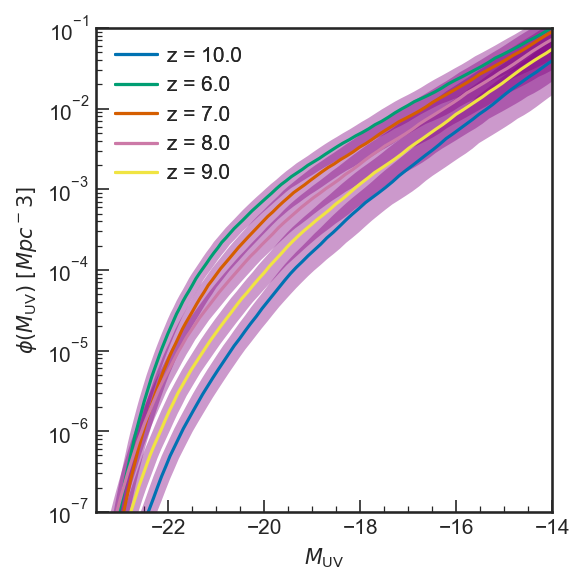

In [42]:
fig = plt.figure(figsize=(4.,4.), dpi=150)
#For loop used in order to plot data for each zval
for zz,zval in enumerate (LFz_tab): 
    if zval in zval_array:
        LF_tab = load_uvf_pandas(LFz_files[zz])
        label = 'z = %.1f'%zval
        ls = 'solid'
#         if zval == 5.7:
#             my_color='purple'
#         elif zval== 6.6:
#             my_color='orange'
#         else:
#             my_color='green' 
# #         ax2 = plt.subplot(212,sharex = ax1)
        plt.plot(LF_tab['Muv'],LF_tab['ndens'], ls=ls, label=label)
        
        plt.fill_between(LF_tab['Muv'],LF_tab['ndens_l'],LF_tab['ndens_u'],lw = 0, color=my_color, alpha=0.4)
        ## this is used for upper,lower limits of ndens, however when plotted it makes minor difference
        
#Legend
leg_z = plt.legend(frameon=False, handletextpad=0.5)
plt.gca().add_artist(leg_z)

plt.minorticks_on()
plt.xlim(-23.5,-14)
plt.ylim(1e-7, 1e-1)
plt.semilogy()


plt.xlabel('$M_\mathrm{UV}$')
plt.ylabel(r'$\phi(M_\mathrm{UV})\ [Mpc^-3]$')
# plt.title('Predicted UV Luminosity Functions')
plt.tight_layout()